### Description
This project shows how to use an external API to collect and analyse data. It connects to the FakeStoreAPI to get product information in JSON format,  
turns it into a DataFrame, and then reviews product prices and ratings across different categories.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
url = "https://fakestoreapi.com/products"

In [3]:
resp = requests.get(url)

In [4]:
data = resp.json()

In [5]:
data

[{'id': 1,
  'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops',
  'price': 109.95,
  'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_t.png',
  'rating': {'rate': 3.9, 'count': 120}},
 {'id': 2,
  'title': 'Mens Casual Premium Slim Fit T-Shirts ',
  'price': 22.3,
  'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.',
  'category': "men's clothing",
  'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_t.png',
  'rating': {'rate': 4.1, 'count': 259}},
 {'

In [6]:
df_store = pd.json_normalize(data)

In [7]:
df_store.head()

,id,title,price,description,category,image,rating.rate,rating.count
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,2.1,430
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,4.6,400


In [11]:
df_store.rename(columns={"rating.rate": "rating","rating.count" : "rating_count "}, inplace=True)

In [12]:
df_store.head(3)

,id,title,price,description,category,image,rating,rating_count
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500


In [15]:
print("Total Products:", len(df_store))
print("Average Price:", round(df_store['price'].mean(), 2))
print("Average Rating:", round(df_store['rating'].mean(), 2))
print("\nProducts by Category:")
print(df_store['category'].value_counts())


Total Products: 20
Average Price: 162.05
Average Rating: 3.56

Products by Category:
category
women's clothing    6
electronics         6
jewelery            4
men's clothing      4
Name: count, dtype: int64


In [17]:
avg_price = df_store.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price

category
electronics         332.498333
jewelery            220.995000
men's clothing       51.057500
women's clothing     26.286667
Name: price, dtype: float64

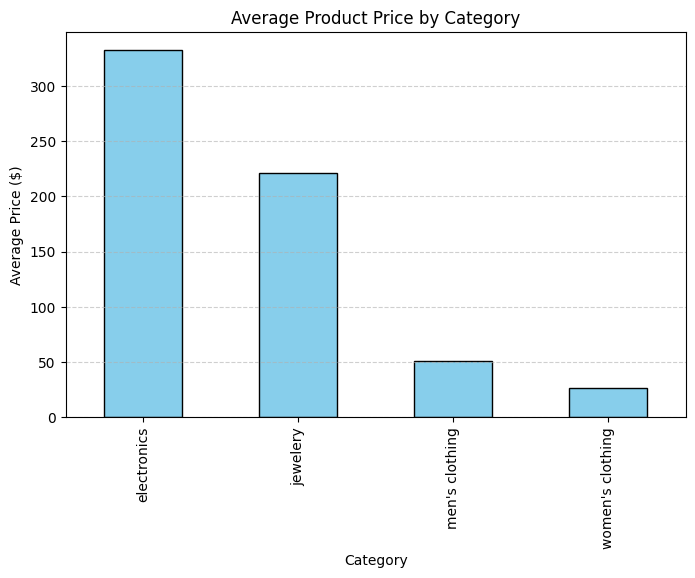

In [18]:
plt.figure(figsize=(8,5))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Product Price by Category')
plt.ylabel('Average Price ($)')
plt.xlabel('Category')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


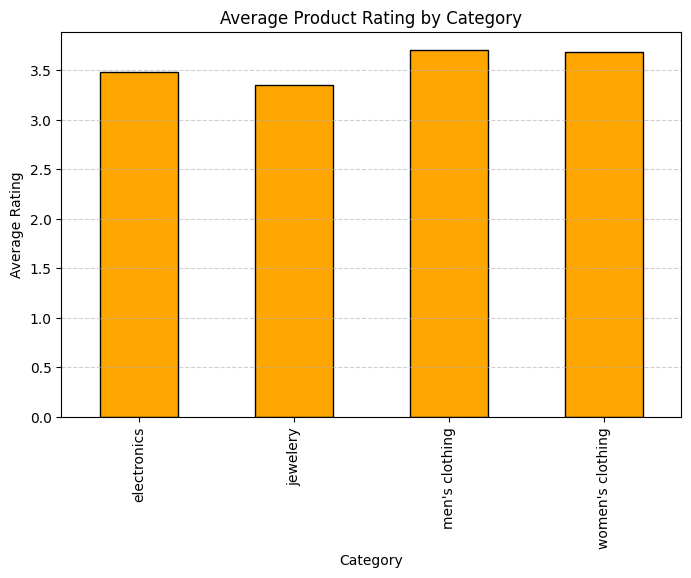

In [19]:
avg_rating = df_store.groupby('category')['rating'].mean()
avg_rating.plot(kind='bar', color='orange', edgecolor='black', figsize=(8,5))
plt.title('Average Product Rating by Category')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [21]:
df_store.to_csv("fakestore_products.csv", index=False)